# IMPORTING DEPENDENCIES

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
import matplotlib.pyplot as plt
import tensorflowjs as tfjs

# LOADING DATA

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Shape of x_train data : {x_train.shape}")
print(f"Shape of y_train data : {y_train.shape}")
print()
print(f"Shape of x_test data : {x_test.shape}")
print(f"Shape of y_test data : {y_test.shape}")

Shape of x_train data : (60000, 28, 28)
Shape of y_train data : (60000,)

Shape of x_test data : (10000, 28, 28)
Shape of y_test data : (10000,)


# VISUALIZING DATA

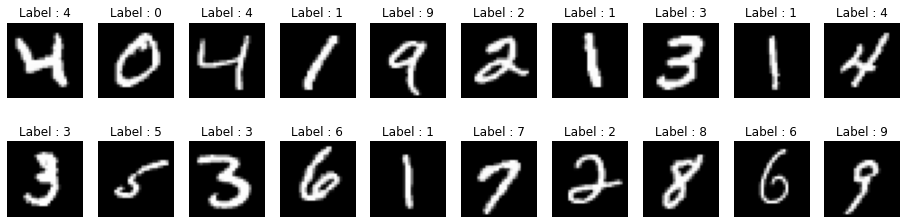

In [3]:
plt.figure(figsize=(16,4))
for i, (img, label) in enumerate(zip(x_train, y_train)):
    plt.subplot(2,10, i%20 +1)
    plt.axis('off')
    plt.title(f"Label : {label}")
    plt.imshow(img, cmap='gray')
    if i==20:
        break

# PROCESSING DATA

In [4]:
def pre_process_data(data, label, batch_size=64, shuffle=False):
    data = data.reshape(-1, data.shape[1], data.shape[2], 1)
    tf_ds = tf.data.Dataset.from_tensor_slices((data, label))
    if shuffle:
        tf_ds = tf_ds.shuffle(data.shape[0]//2)
    return tf_ds.batch(batch_size)

In [5]:
# To use convolutuional model the image need to be an 3 dimensional array [height, width, channels]
train_ds = pre_process_data(x_train, y_train)
test_ds = pre_process_data(x_test, y_test)

# BUILDING MODEL

In [6]:
def build_model(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(8, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(16, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation="softmax"))
    return model

In [7]:
model = build_model([28,28,1])
model.compile(loss=losses.SparseCategoricalCrossentropy(), 
              optimizer=optimizers.Adam(learning_rate=0.001, decay=1e-8),
              metrics=["accuracy"])

# TRAINING MODEL

In [8]:
his = model.fit(train_ds, validation_data=test_ds, epochs=15, verbose=2)

# Saving the model
model.save("./model/mnistModel")

# Saving the model in js format
tfjs.converters.save_keras_model(model, "./model/mnistJSModel")

Epoch 1/15
938/938 - 17s - loss: 0.6210 - accuracy: 0.7931 - val_loss: 0.1077 - val_accuracy: 0.9686
Epoch 2/15
938/938 - 17s - loss: 0.2326 - accuracy: 0.9294 - val_loss: 0.0828 - val_accuracy: 0.9763
Epoch 3/15
938/938 - 18s - loss: 0.1825 - accuracy: 0.9458 - val_loss: 0.0603 - val_accuracy: 0.9833
Epoch 4/15
938/938 - 17s - loss: 0.1568 - accuracy: 0.9533 - val_loss: 0.0510 - val_accuracy: 0.9848
Epoch 5/15
938/938 - 18s - loss: 0.1407 - accuracy: 0.9585 - val_loss: 0.0519 - val_accuracy: 0.9853
Epoch 6/15
938/938 - 17s - loss: 0.1283 - accuracy: 0.9616 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 7/15
938/938 - 16s - loss: 0.1199 - accuracy: 0.9646 - val_loss: 0.0448 - val_accuracy: 0.9876
Epoch 8/15
938/938 - 17s - loss: 0.1113 - accuracy: 0.9669 - val_loss: 0.0468 - val_accuracy: 0.9863
Epoch 9/15
938/938 - 17s - loss: 0.1077 - accuracy: 0.9686 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 10/15
938/938 - 16s - loss: 0.1014 - accuracy: 0.9696 - val_loss: 0.0418 - val_accura

Text(0.5, 1.0, 'TRAINING STATS')

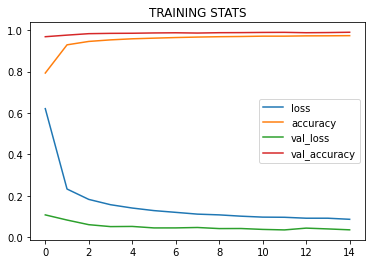

In [9]:
import pandas as pd

stats = pd.DataFrame(his.history)
stats.plot()
plt.title("TRAINING STATS")


# MODEL EVALUATION

In [10]:
evaluation = model.evaluate(test_ds)
print(f"Evaluated loss : {evaluation[0]}\nEvaluated accuracy : {evaluation[1]}")

157/157 [==============================] - 1s 5ms/step - loss: 0.0354 - accuracy: 0.9902
Evaluated loss : 0.03544133901596069
Evaluated accuracy : 0.9901999831199646
